# Hospital report

In [1]:
from IPython.display import Image
import pandas as pd

from utils.stroke_team_reporting import StrokeTeamReporting

## Set team

Set team and set up reporting object.

In [2]:
team = 'Torbay Hospital'
team_report = StrokeTeamReporting(team)

## Show overall improvement possible

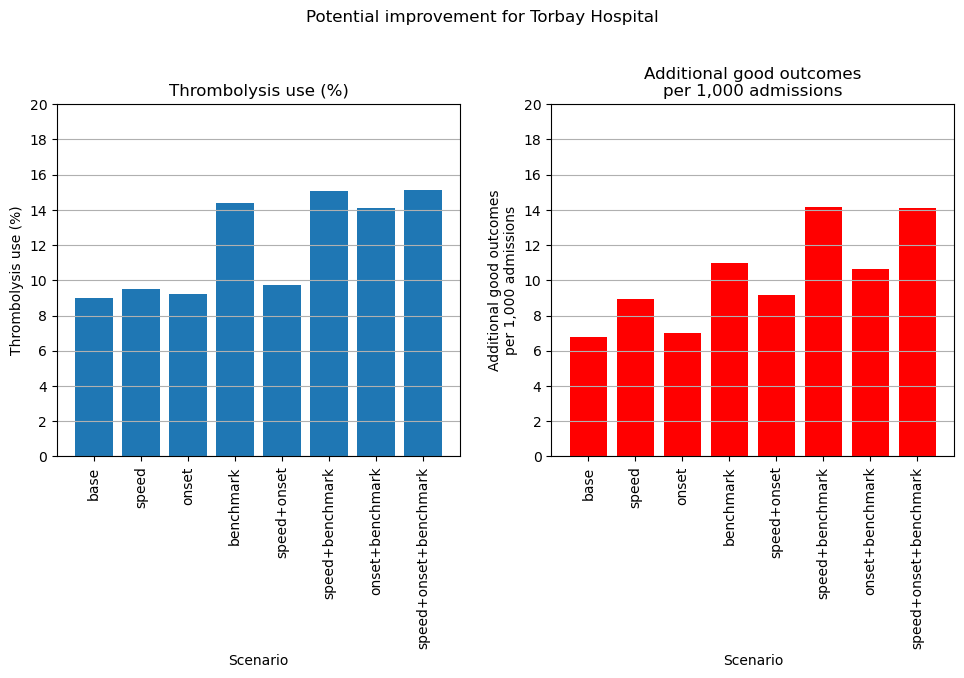

In [3]:
figure = team_report.plot_improvement()

## Show how thrombolysis decisions compare to 25 benchmark hospitals

In [4]:
team_report.prototype_patients.T

Patient prototype,Ideal,Mild,Prior disability,Imprecise,Mild + Prior disability,Mild + Imprecise,Imprecise + Prior disability,Mild + Prior disability + Imprecise
stroke_team,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
onset_to_arrival_time,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0
onset_during_sleep,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
arrival_to_scan_time,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0
infarction,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
stroke_severity,15.0,3.0,15.0,15.0,3.0,3.0,15.0,3.0
precise_onset_known,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
prior_disability,0.0,0.0,2.0,0.0,2.0,0.0,2.0,2.0
afib_anticoagulant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
age,72.5,72.5,72.5,72.5,72.5,72.5,72.5,72.5


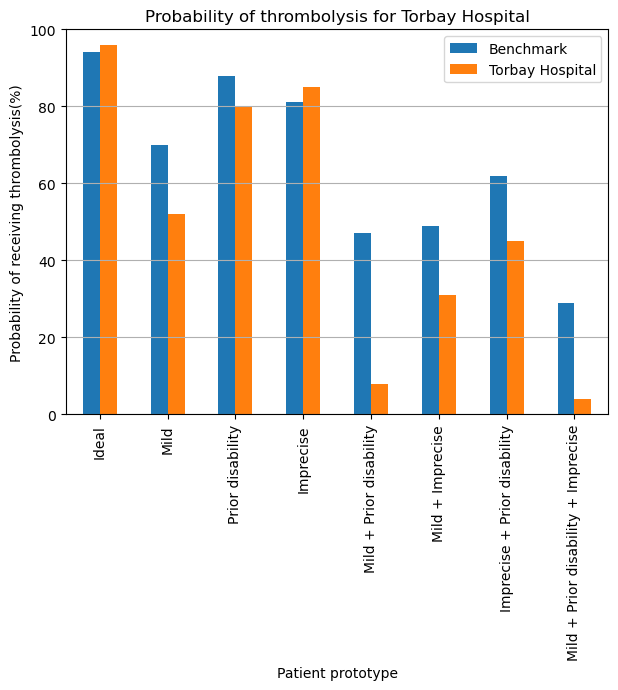

In [5]:
team_report.show_prototype_patients()